## YOLO Object Detection (via Tensornets + TF 1)

In [1]:
import tensorflow.compat.v1 as tf  # for TF 2
import tensornets as nets
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools
from tqdm import tqdm

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.

---------- Model Summary ----------
Scope: REFtinyyolov2voc
Total layers: 9
Total weights: 42
Total parameters: 15,867,885
Scope: REFtinyyolov2voc
conv1/conv/Conv2D:0 (None, 416, 416, 16)
conv1/bn/FusedBatchNormV3:0 (None, 416, 416, 16)
conv1/bias/BiasAdd:0 (None, 416, 416, 16)
conv1/lrelu:0 (None, 416, 416, 16)
pool1/MaxPool:0 (None, 208, 208, 16)
conv2/conv/Conv2D:0 (None, 208, 208, 32)
conv2/bn/FusedBatchNormV3:0 (None, 208, 208, 32)
conv2/bias/BiasAdd:0 (None, 208, 208, 32)
conv2/lrelu:0 (None, 208, 208, 32)
pool2/MaxPool:0 (None, 104, 104, 32)
conv3/conv/Conv2D:0 (None, 104, 104, 64)
conv3/bn/FusedBatchNormV3:0 (None, 104, 104, 64)
conv3/bias/BiasAdd:0 (None, 104, 104, 64)
conv3/lrelu:0 (None, 104, 104, 64)
pool3/MaxPool:0 (None, 52, 52, 64)
conv4/conv/Conv2D:0 (None, 52, 52, 128)


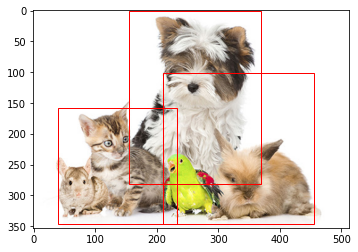

In [2]:

tf.compat.v1.disable_eager_execution() # disable eager execution in TF1 (slightly faster)

inputs = tf.placeholder(tf.float32, [None, 416, 416, 3])
default_model = nets.TinyYOLOv2VOC(inputs)

img = nets.utils.load_img('pets.jpg')

with tf.Session() as sess:
    sess.run(default_model.pretrained())
    preds = sess.run(default_model, {inputs: default_model.preprocess(img)})
    boxes = default_model.get_boxes(preds, img.shape[1:3])

    fig, ax = plt.subplots()
    ax.imshow(img[0].astype(np.uint8))
    for box_type in boxes:
        for r in box_type:
            rect = patches.Rectangle((r[0], r[1]), r[2]-r[0], r[3]-r[1], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
    # print model summary:
    print('\n---------- Model Summary ----------')
    default_model.summary()
    default_model.print_outputs()
